In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np
import itertools #스피어만 상관계수

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df=pd.read_csv("당기순익_merge.csv",index_col='결산년도',encoding='euc-kr')
df1=pd.read_csv('금리,환율_전처리.csv',index_col='일자',encoding='euc-kr')

In [4]:
list1=df.columns

In [5]:
df['합']=[0 for i in range(len(df.index))]
for i in df.columns:
    df['합']=df['합']+df[i]
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차,합
결산년도,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0,221012.0
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0,216296.0
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0,266802.0
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0,309378.0
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0,338266.0
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,-1686.0,12879.0,278186.0
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,4659.0,7316.0,311218.0
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,5529.0,8107.0,293136.0
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,4496.0,3060.0,350310.0


In [6]:
df['증가율']=[0 for i in range(len(df.index))]
for i in range(1,len(df.index)):
    df.iloc[i,13]=(df.iloc[i,12]-df.iloc[i-1,12])/abs(df.iloc[i-1,12])*100
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차,합,증가율
결산년도,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0,221012.0,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0,216296.0,-2.133821
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0,266802.0,23.350409
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0,309378.0,15.957901
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0,338266.0,9.337445
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,-1686.0,12879.0,278186.0,-17.761170
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,4659.0,7316.0,311218.0,11.874070
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,5529.0,8107.0,293136.0,-5.810075
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,4496.0,3060.0,350310.0,19.504257


In [7]:
for n in range(len(list1)):
    df[list1[n]+'증가율']=[0 for i in range(len(df.index))]
    for i in range(1,len(df.index)):
        if df.iloc[i-1,n] ==0.0:
            pass
        else :
            df.iloc[i,n+14]=(df.iloc[i,n]-df.iloc[i-1,n])/abs(df.iloc[i-1,n])*100
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,LG 화학증가율,NAVER증가율,SK 텔레콤증가율,삼성물산증가율,삼성바이오로직스증가율,삼성전자증가율,포스코 케미칼증가율,한국전력증가율,현대 모비스증가율,현대차증가율
결산년도,,,,,,,,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,-9.213181,-7.676768,47.376591,78.630705,0.000000,56.195597,20.765027,-90.487373,-1.190139,-4.469074
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,103.000000,15.371991,22.919739,-27.371274,41.929825,8.414221,4.072398,222.003578,9.248638,31.521332
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,7.699325,-18.729256,6.341045,-41.524520,33.232628,43.848576,-23.478261,-60.122222,-36.710854,-35.007470
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,-7.589361,25.904317,27.800161,19.781222,-43.438914,1.261998,72.159091,326.079688,0.000000,2.802102
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,-38.020165,-20.296571,-16.696091,-60.121766,68.138801,9.485054,8.910891,-188.072195,-134.964745,37.127342
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,63.472345,-10.581395,4.965183,617.366412,-362.376238,-4.623381,-4.545455,81.400356,376.334520,-43.194347
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,-10.729148,83.224967,31.857514,-11.652035,58.244111,-5.519100,1.904762,-266.706587,18.673535,10.811919
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-29.752736,-75.727466,14.820081,-29.027401,-38.461538,19.081986,15.887850,180.263444,-18.683306,-62.254841


In [16]:
for n in range(len(list1)):
    df[list1[n]+'전체대비증가율']=[0 for i in range(len(df.index))]
    for i in range(1,len(df.index)):
        df.iloc[i,n+26]=(df.iloc[i,n+14]-df.iloc[i,13])
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,LG 화학전체대비증가율,NAVER전체대비증가율,SK 텔레콤전체대비증가율,삼성물산전체대비증가율,삼성바이오로직스전체대비증가율,삼성전자전체대비증가율,포스코 케미칼전체대비증가율,한국전력전체대비증가율,현대 모비스전체대비증가율,현대차전체대비증가율
결산년도,,,,,,,,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,-7.079360,-5.542947,49.510412,80.764526,2.133821,58.329418,22.898848,-88.353552,0.943682,-2.335253
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,79.649591,-7.978417,-0.430670,-50.721682,18.579416,-14.936187,-19.278011,198.653169,-14.101771,8.170924
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,-8.258576,-34.687157,-9.616856,-57.482422,17.274727,27.890675,-39.436162,-76.080124,-52.668756,-50.965371
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,-16.926806,16.566873,18.462716,10.443777,-52.776359,-8.075447,62.821646,316.742243,-9.337445,-6.535343
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,-20.258995,-2.535401,1.065079,-42.360595,85.899971,27.246224,26.672061,-170.311024,-117.203575,54.888513
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,51.598276,-22.455465,-6.908887,605.492342,-374.250307,-16.497451,-16.419524,69.526287,364.460450,-55.068417
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,-4.919073,89.035043,37.667589,-5.841960,64.054187,0.290975,7.714837,-260.896512,24.483610,16.621994
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-49.256994,-95.231724,-4.684176,-48.531659,-57.965796,-0.422272,-3.616407,160.759187,-38.187564,-81.759099


In [11]:
df1.index = pd.to_datetime(df1.index)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'KB 금융전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 생활건강전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 화학전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'NAVER전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'SK 텔레콤전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성물산전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성바이오로직스전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성전자전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '포스코 케미칼전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '한국전력전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대 모비스전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대차전체대비증가율')

Text(0, 0.5, '전체대비증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '전체 증가율')

Text(0, 0.5, '증가율')

Text(0.5, 0, '분기')

(-200.0, 200.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, '전체합')

Text(0, 0.5, '당기순익')

Text(0.5, 0, '분기')

Text(0.5, 1.0, '금리')

Text(0, 0.5, '금리')

Text(0.5, 0, '년도')

Text(0.5, 1.0, '달러환율')

Text(0, 0.5, '달러환율')

Text(0.5, 0, '년도')

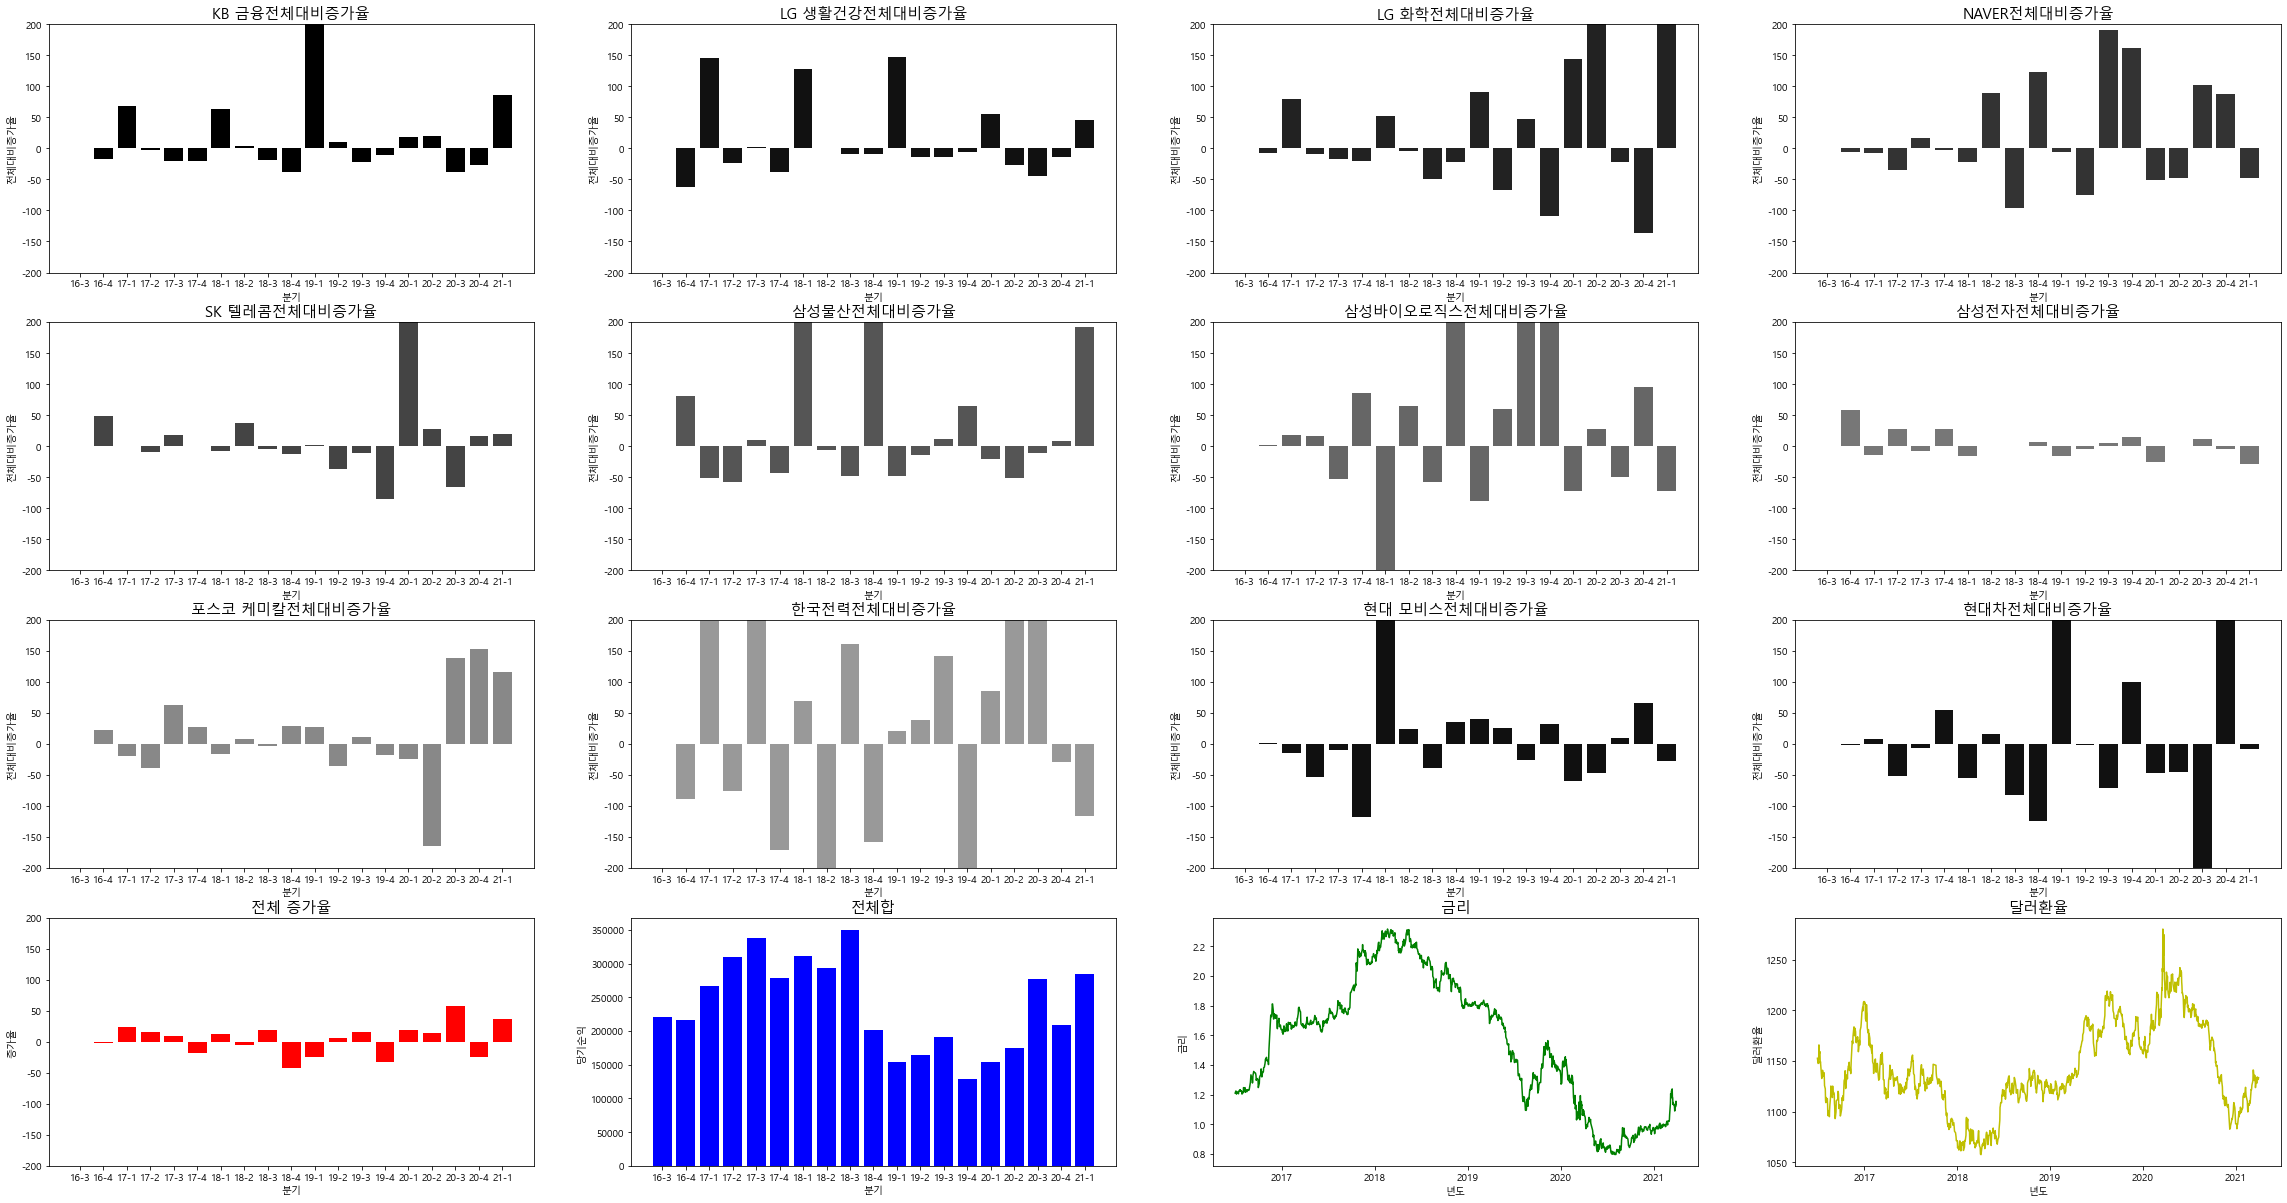

In [18]:
do = plt.figure(figsize=(40, 21)) # 차트 생성 및 사이즈 설정
xtick = ['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
for i in range(12):
    do1=do.add_subplot(4,4,i+1) # subplot 생성
    do1.bar(xtick,df[df.columns[26+i]], color='#'+str(i)*3)
    do1.set_title(df.columns[26+i], fontsize=15) # 타이틀 설정
    do1.set_ylabel('전체대비증가율', fontsize=10) # x축 설정
    do1.set_xlabel('분기',fontsize=10) # y축 설정
    plt.ylim(-200,200)
do1=do.add_subplot(4,4,13)
do1.bar(xtick,df[df.columns[13]],color='r')
do1.set_title('전체 증가율', fontsize=15) # 타이틀 설정
do1.set_ylabel('증가율', fontsize=10) # x축 설정
do1.set_xlabel('분기',fontsize=10) # y축 설정
plt.ylim(-200,200)
do1=do.add_subplot(4,4,14)
do1.bar(xtick,df[df.columns[12]],color='b')
do1.set_title('전체합', fontsize=15) # 타이틀 설정
do1.set_ylabel('당기순익', fontsize=10) # x축 설정
do1.set_xlabel('분기',fontsize=10) # y축 설정
do1=do.add_subplot(4,4,15)
do1.plot(df1['금리'],color='g')
do1.set_title('금리', fontsize=15) # 타이틀 설정
do1.set_ylabel('금리', fontsize=10) # x축 설정
do1.set_xlabel('년도',fontsize=10) # y축 설정
do1=do.add_subplot(4,4,16)
do1.plot(df1['달러환율'],color='y')
do1.set_title('달러환율', fontsize=15) # 타이틀 설정
do1.set_ylabel('달러환율', fontsize=10) # x축 설정
do1.set_xlabel('년도',fontsize=10) # y축 설정
plt.show()

In [19]:
do.savefig('전체대비증가율.png')

In [21]:
df.to_csv('당기순익_증가율.csv',encoding='euc-kr')

TypeError: can't multiply sequence by non-int of type 'float'

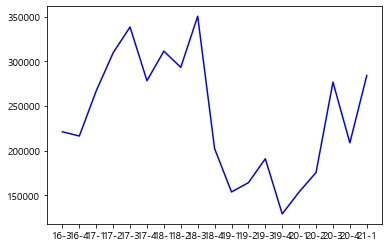

In [22]:
plt.plot(xtick,df[df.columns[12]],color='b')
for  n in range(18):
    plt.text(xtick[n]*1.02,
             df[df.columns[12]][n]*0.98,
            df_sort.index[n],
            fontsize=10)